<a href="https://colab.research.google.com/github/Jung0Jin/Python_Machine_Learning/blob/master/%EB%A8%B8%EC%8B%A0%EB%9F%AC%EB%8B%9D%EA%B5%90%EA%B3%BC%EC%84%9C4%EC%9E%A5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#4장 좋은 훈련 세트 만들기: 데이터 전처리

+ 데이터셋에서 누락된 값을 제거하거나 대체하기

+ 머신 러닝 알고리즘을 위해 범주형 데이터 변환하기

+ 모델과 관련이 높은 특성 선택하기

##4.1 누락된 데이터 다루기

NaN : Not A Number 숫자가 아니다.

NULL : 없다는 의미

###4.1.1 테이블 형태 데이터에서 누락된 값 식별

In [0]:
import pandas as pd
from io import StringIO

In [0]:
csv_data = \
'''A,B,C,D
1.0, 2.0, 3.0, 4.0
5.0, 6.0,,8.0
10.0,11.0,12.0,'''

In [0]:
df = pd.read_csv(StringIO(csv_data)) # StringIO 함수를 사용하면 하드 디스크에 있는 일반 CSV 파일처럼 csv_data에 저장된 문자열을 읽어올 수 있다.

In [186]:
df

,A,B,C,D
0,1.0,2.0,3.0,4.0
1,5.0,6.0,NaN,8.0
2,10.0,11.0,12.0,NaN


In [187]:
df.isnull().sum()

A    0
B    0
C    1
D    1
dtype: int64

In [188]:
df.values

array([[ 1.,  2.,  3.,  4.],
       [ 5.,  6., nan,  8.],
       [10., 11., 12., nan]])

###4.1.2 누락된 값이 있는 샘플이나 특성 제외

In [189]:
df

,A,B,C,D
0,1.0,2.0,3.0,4.0
1,5.0,6.0,NaN,8.0
2,10.0,11.0,12.0,NaN


In [190]:
df.dropna(axis=0) # 누락된 값이 있는 행 삭제

,A,B,C,D
0,1.0,2.0,3.0,4.0


In [191]:
df.dropna(axis=1) # 누락된 값이 있는 열 삭제

,A,B
0,1.0,2.0
1,5.0,6.0
2,10.0,11.0


In [192]:
df.dropna(how='all') # 모든 열이 NaN인 행 삭제하기

,A,B,C,D
0,1.0,2.0,3.0,4.0
1,5.0,6.0,NaN,8.0
2,10.0,11.0,12.0,NaN


In [193]:
df.dropna(thresh=4) # 실수 값이 네 개보다 작은 행 삭제

,A,B,C,D
0,1.0,2.0,3.0,4.0


In [194]:
df.dropna(subset=['C']) # 특정 열에 NaN이 있는 행만 삭제

,A,B,C,D
0,1.0,2.0,3.0,4.0
2,10.0,11.0,12.0,NaN


###4.1.3 누락된 값 대체

In [195]:
!pip install Imputer

ERROR: Could not find a version that satisfies the requirement Imputer (from versions: none)
ERROR: No matching distribution found for Imputer


In [196]:
import numpy as np

from sklearn.impute import SimpleImputer
simr = SimpleImputer(missing_values=np.nan, strategy='mean') # mean : 평균으로 대체, median : 중앙값으로 대체, most_frequent : 최빈도값
simr = simr.fit(df.values)
imputed_data = simr.transform(df.values)
imputed_data

array([[ 1. ,  2. ,  3. ,  4. ],
       [ 5. ,  6. ,  7.5,  8. ],
       [10. , 11. , 12. ,  6. ]])

In [197]:
from sklearn.preprocessing import FunctionTransformer
ftr_simr = FunctionTransformer(lambda X: simr.fit_transform(X.T).T, validate=False)
imputed_data = ftr_simr.fit_transform(df.values)
imputed_data

array([[ 1.        ,  2.        ,  3.        ,  4.        ],
       [ 5.        ,  6.        ,  6.33333333,  8.        ],
       [10.        , 11.        , 12.        , 11.        ]])

###4.1.4 사이킷런 추정기 API 익히기

##4.2 범주형 데이터 다루기

###4.2.1 순서가 있는 특성과 순서가 없는 특성

In [198]:
import pandas as pd
df = pd.DataFrame([
                   ['green', 'M', 10.1, 'class1'],
                   ['red', 'L', 13.5, 'class2'],
                   ['blue', 'XL', 15.3, 'class1']])
df.columns = ['color', 'size', 'price', 'classlabel']
df

,color,size,price,classlabel
0,green,M,10.1,class1
1,red,L,13.5,class2
2,blue,XL,15.3,class1


color : 순서가 없는 특성

size : 순서가 있는 특성

prcie : 수치형 특성

###4.2.2 순서 특성 매핑

In [0]:
size_mapping = {
    'XL' : 3,
    'L' : 2,
    'M' : 1
}

In [0]:
df['size'] = df['size'].map(size_mapping)

In [201]:
df

,color,size,price,classlabel
0,green,1,10.1,class1
1,red,2,13.5,class2
2,blue,3,15.3,class1


In [202]:
inv_size_mapping = {v: k for k, v in size_mapping.items()}
df['size'].map(inv_size_mapping)

0     M
1     L
2    XL
Name: size, dtype: object

###4.2.3 클래스 레이블 인코딩

In [203]:
import numpy as np
class_mapping = {label:idx for idx, label in
                 enumerate(np.unique(df['classlabel']))}
class_mapping

{'class1': 0, 'class2': 1}

In [204]:
df['classlabel'] = df['classlabel'].map(class_mapping)
df

,color,size,price,classlabel
0,green,1,10.1,0
1,red,2,13.5,1
2,blue,3,15.3,0


In [205]:
inv_class_mapping = {v:k for k,v in class_mapping.items()}
df['classlabel'] = df['classlabel'].map(inv_class_mapping)
df

,color,size,price,classlabel
0,green,1,10.1,class1
1,red,2,13.5,class2
2,blue,3,15.3,class1


In [206]:
from sklearn.preprocessing import LabelEncoder
class_le = LabelEncoder()
y = class_le.fit_transform(df['classlabel'].values)
y

array([0, 1, 0])

In [207]:
class_le.inverse_transform(y)

array(['class1', 'class2', 'class1'], dtype=object)

###4.2.4 순서가 없는 특성에 원-핫 인코딩 적용

In [208]:
X = df[['color', 'size', 'price']].values
color_le = LabelEncoder()
X[:, 0] = color_le.fit_transform(X[:, 0])
X

array([[1, 1, 10.1],
       [2, 2, 13.5],
       [0, 3, 15.3]], dtype=object)

In [209]:
from sklearn.preprocessing import OrdinalEncoder # 범주형 데이터를 정수로 인코딩 해준다.
from sklearn.compose import ColumnTransformer # 판다스 데이터프레임의 열마다 다른 변환을 적용하도록 도와준다.
ord_enc = OrdinalEncoder(dtype=np.int)
col_trans = ColumnTransformer([('ord_enc', ord_enc, ['color'])])
X_trans = col_trans.fit_transform(df)
X_trans

array([[1],
       [2],
       [0]])

In [210]:
col_trans.named_transformers_['ord_enc'].inverse_transform(X_trans)

array([['green'],
       ['red'],
       ['blue']], dtype=object)

In [211]:
from sklearn.preprocessing import OneHotEncoder
oh_enc = OneHotEncoder(categories='auto')
col_trans = ColumnTransformer([('oh_enc', oh_enc, [0])], remainder='passthrough')
col_trans.fit_transform(X) 

array([[0.0, 1.0, 0.0, 1, 10.1],
       [0.0, 0.0, 1.0, 2, 13.5],
       [1.0, 0.0, 0.0, 3, 15.3]], dtype=object)

In [212]:
pd.get_dummies(df[['price', 'color', 'size']])

,price,size,color_blue,color_green,color_red
0,10.1,1,0,1,0
1,13.5,2,0,0,1
2,15.3,3,1,0,0


다중 공선성을 생각해라. 역행렬을 구할 때 이슈가 된다. 

특성 간의 상관관계가 높으면 역행렬을 계산하기 어렵다.

변수 간의 상관관계를 감소하려면 열 하나를 삭제한다.

잃는 정보는 없다. 삭제 당하지 않는 정보가 삭제 당한 정보를 알려준다.

In [213]:
pd.get_dummies(df[['price', 'color', 'size']],
               drop_first=True) 

,price,size,color_green,color_red
0,10.1,1,1,0
1,13.5,2,0,1
2,15.3,3,0,0


OneHotEncoder에서는 슬라이싱으로 사용해라.

##4.3 데이터셋을 훈련 세트와 테스트 세트로 나누기

In [214]:
from sklearn.datasets import load_wine
wine = load_wine()
df_wine = pd.DataFrame(wine.data, columns=wine.feature_names)
temp = pd.Series(wine.target+1, dtype='category')
df_wine['Class label'] = temp

print('클래스 레이블', np.unique(df_wine['Class label']))
df_wine.head()

클래스 레이블 [1 2 3]


,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,Class label
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,1
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,1
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,1
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,1
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,1


In [0]:
from sklearn.model_selection import train_test_split
X, y = df_wine.iloc[:, :-1].values, df_wine.iloc[:, -1].values
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.3,
                                                    random_state=0,
                                                    stratify=y)

데이터셋을 훈련 세트와 테스트 세트로 나누면 학습 알고리즘에 도움이 될 수 있는 유익한 정보고 감추게 된다. 따라서 테스트 세트로 너무 많은 정보를 떼어 놓아서는 안 된다.

반대로 테스트 세트가 작으면 일반화 오차에 대한 추정이 부정확해질 수 있다.

가장 많이 사용하는 비율은 8:2 다. 대용량의 경우 9:1도 가능하다.

떼어 놓았던 테스트 세트를 버리지 말고 훈련과 평가 후에 다시 전체 데이셋으로 모델을 훈련시키자.

##4.4 특성 스케일 맞추기

결정 트리, 랜덤 포레스트는 특성 스케일 조정을 안해도 된다.

나머지는 다 해야 한다.

스케일을 맞추는 대표적인 방법은 정규화(normalization)와 표준화(standardization)이다.

정규화는 특성의 스케일을 [0, 1] 범위에 맞추는 것으로 범위가 정해진 값이 필요할 때 유용하게 사용할 수 있다.

표준화는 평균을 0, 표준편차를 1로 만들어 정규 분포와 같은 특징을 가지도록 만든다. 이러면 가중치를 더 쉽게 학습할 수 있다. 또, 이상치 정보가 유지되기 때문에 제한된 범위로 데이터를 조정하는 최소-최대 스케일 변환에 비해 알고리즘이 이상치에 덜 민감하다.

In [0]:
from sklearn.preprocessing import MinMaxScaler
mms = MinMaxScaler()
X_train_norm = mms.fit_transform(X_train)
X_test_norm = mms.transform(X_test)

In [217]:
ex = np.array([0, 1, 2, 3, 4, 5])
print(f'표준화 {(ex - ex.mean())/ ex.std()}')
print(f'정규화 {(ex-ex.min())/ (ex.max() - ex.min())}')

표준화 [-1.46385011 -0.87831007 -0.29277002  0.29277002  0.87831007  1.46385011]
정규화 [0.  0.2 0.4 0.6 0.8 1. ]


In [0]:
from sklearn.preprocessing import StandardScaler
stdsc = StandardScaler()
X_train_std = stdsc.fit_transform(X_train)
X_test_std = stdsc.fit_transform(X_test)

##4.5 유용한 특성 선택

과대적합(overfitting) : 훈련 세트는 잘 맞추는데 테스트 세트는 잘 못 맞춘다.

과대적합은 모델 파라미터가 훈련 세트에 너무 가깝게 맞추어져 있다는 의미

새로운 데이터에는 일반화하지 못하기 때문에 모델 분산이 크다고 말한다.

과제적합은 훈련 데이터에 비해 모델이 너무 복잡하기 떄문이다.

일반화 오차를 감소시키기 위한 방법

1. 더 많은 훈련 데이터를 모은다.

2. 규제를 통해 복잡도를 제한한다.

3. 파라미터 개수가 적은 간단한 모델을 선택한다.

4. 데이터 차원을 줄인다.

###4.5.1 모델 복잡도 제한을 위한 L1 규제와 L2 규제

###4.5.2 L2 규제의 기하학적 해석

###4.5.3 L1 규제를 사용한 희소성

In [219]:
from sklearn.linear_model import LogisticRegression
LogisticRegression(solver='libinear', multi_class = 'auto', penalty='l1')

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l1',
                   random_state=None, solver='libinear', tol=0.0001, verbose=0,
                   warm_start=False)

In [220]:
lr = LogisticRegression(solver='liblinear', multi_class='auto', penalty='l1',
                        C=1.0, random_state=42)
lr.fit(X_train_std, y_train)
print(f'훈련 정확도 : {lr.score(X_train_std, y_train)}')
print(f'테스트 정확도 : {lr.score(X_test_std, y_test)}')

훈련 정확도 : 1.0
테스트 정확도 : 1.0


In [221]:
lr.intercept_

array([-1.26341605, -1.21598985, -2.3701943 ])

In [222]:
lr.coef_

array([[ 1.24579421,  0.18061164,  0.74359352, -1.16112462,  0.        ,
         0.        ,  1.16957619,  0.        ,  0.        ,  0.        ,
         0.        ,  0.54788874,  2.51037422],
       [-1.53699942, -0.38746609, -0.99525191,  0.36498543, -0.05970899,
         0.        ,  0.6678873 ,  0.        ,  0.        , -1.93417045,
         1.23366592,  0.        , -2.23177895],
       [ 0.13562632,  0.16843221,  0.3572171 ,  0.        ,  0.        ,
         0.        , -2.43829335,  0.        ,  0.        ,  1.56374546,
        -0.81900707, -0.49232727,  0.        ]])

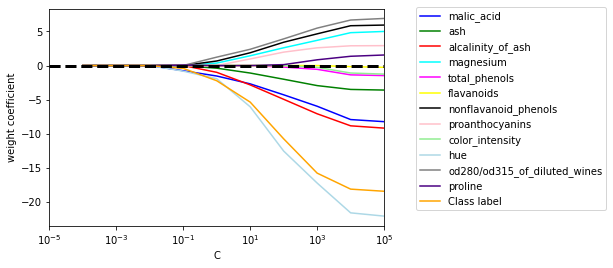

In [223]:
import matplotlib.pyplot as plt

fig = plt.figure()
ax = plt.subplot(111)

colors = ['blue', 'green', 'red', 'cyan',
          'magenta', 'yellow', 'black',
          'pink', 'lightgreen', 'lightblue',
          'gray', 'indigo', 'orange']
weights, params = [], []
for c in np.arange(-4., 6.):
  lr = LogisticRegression(solver='liblinear', multi_class='auto',
                          penalty='l1', C=10.**c,
                          random_state=0)
  lr.fit(X_train_std, y_train)
  weights.append(lr.coef_[1])
  params.append(10**c)

weights = np.array(weights)

for column, color in zip(range(weights.shape[1]), colors):
  plt.plot(params, weights[:, column],
           label=df_wine.columns[column + 1],
           color=color)

plt.axhline(0, color='black', linestyle='--', linewidth=3)
plt.xlim([10**(-5), 10**5])
plt.ylabel('weight coefficient')
plt.xlabel('C')
plt.xscale('log')
plt.legend(loc='upper left')
ax.legend(loc='upper center',
          bbox_to_anchor = (1.38, 1.03),
          ncol=1, fancybox=True)
plt.show()

###4.5.4 순차 특성 선택 알고리즘

과대적합을 피하는 방법 중 하나 : 특성 선택을 통한 차원 축소(dimensionality reduction)

차원 축소 기법 : 특성 선택(feature selection)과 특성 추출(feature extraction)

특성 선택 : 원본 특성에서 일부를 선택

특성 추출 : 일련의 특성에서 얻은 정보로 새로운 특성 만들기

순차 특성 선택(sequential feature selection) : 탐욕적 탐색 알고리즘으로 가장 관련이 높은 특성 부분 집합을 자동으로 선택하는 것이 목적이다. 계산 효율성을 높이고 모델의 일반화 오차를 줄인다. 규제를 제공하지 않는 알고리즘을 사용할 때 유용하다.

순차 후진 선택(Sequential Backward Selection, SBS) : 계산 효율성을 향상하기 위해 모델 성능을 가능한 적게 희생하면서 초기 특성의 부분 공간으로 차원을 축소한다.

In [0]:
from sklearn.base import clone
from itertools import combinations
import numpy as np
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

In [0]:
class SBS():
  def __init__(self, estimator, k_features, # k_features 목표 특성 개수
               scoring=accuracy_score,
               test_size=0.25, random_state=1):
    self.scoring = scoring
    self.estimator = clone(estimator)
    self.k_features = k_features
    self.test_size = test_size
    self.random_state = random_state

  def fit(self, X, y):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=self.test_size,
                                                        random_state=self.random_state)
    dim = X_train.shape[1] # 특성의 수 
    self.indices_ = tuple(range(dim)) # 0 ~ 특성의 수 - 1 만큼
    self.subsets_ = [self.indices_]
    score = self._calc_score(X_train, y_train,
                             X_test, y_test, self.indices_)
    self.scores_ = [score]

    while dim > self.k_features:
      scores = []
      subsets = []

      for p in combinations(self.indices_, r=dim - 1): # 특성 조합 만들기
        score = self._calc_score(X_train, y_train,
                                 X_test, y_test, p)
        scores.append(score)
        subsets.append(p)

      # 최적 조합의 정확도 점수를 모으자
      best = np.argmax(scores)
      self.indices_ = subsets[best] # 최종 선택된 특성의 열 인덱스
      self.subsets_.append(self.indices_)
      dim -= 1
      self.scores_.append(scores[best])
    self.k_score_ = self.scores_[-1]

    return self

  def transform(self, X):
    return X[:, self.indices_] # 선택된 특성 열로 구성된 새로운 데이터 배열을 반환

  def _calc_score(self, X_train, y_train, X_test, y_test,
                  indices):
    self.estimator.fit(X_train[:, indices], y_train)
    y_pred = self.estimator.predict(X_test[:, indices])
    score = self.scoring(y_test, y_pred)
    return score

In [0]:
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier

In [231]:
knn = KNeighborsClassifier(n_neighbors=5)
sbs = SBS(knn, k_features=1)
sbs.fit(X_train_std, y_train)

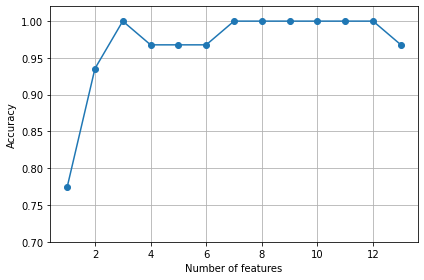

In [232]:
k_feat = [len(k) for k in sbs.subsets_]

plt.plot(k_feat, sbs.scores_, marker='o')
plt.ylim([0.7, 1.02])
plt.ylabel('Accuracy')
plt.xlabel('Number of features')
plt.grid()
plt.tight_layout()
plt.show()

In [233]:
k3 = list(sbs.subsets_[10])
print(df_wine.columns[1:][k3])

Index(['malic_acid', 'ash', 'proline'], dtype='object')


In [234]:
knn.fit(X_train_std, y_train)
print(f'훈련 정확도 : {knn.score(X_train_std, y_train)}')
print(f'테스트 정확도 : {knn.score(X_test_std, y_test)}')

훈련 정확도 : 0.967741935483871
테스트 정확도 : 0.9814814814814815


In [236]:
knn.fit(X_train_std[:, k3], y_train)
print(f'훈련 정확도 : {knn.score(X_train_std[:, k3], y_train)}')
print(f'테스트 정확도 : {knn.score(X_test_std[:, k3], y_test)}')

훈련 정확도 : 0.9516129032258065
테스트 정확도 : 0.9259259259259259


##4.6 랜덤 포레스트의 특성 중요도 사용

In [0]:
from sklearn.ensemble import RandomForestClassifier
feat_labels = df_wine.columns[:-1]
forest = RandomForestClassifier(n_estimators=500,
                                random_state=1)

(1, 30, 'proline', 0.18545260453273973)
(2, 30, 'flavanoids', 0.17475097557788732)
(3, 30, 'color_intensity', 0.14391990337231414)
(4, 30, 'od280/od315_of_diluted_wines', 0.1361619442214559)
(5, 30, 'alcohol', 0.11852941731789315)
(6, 30, 'hue', 0.05873899628096849)
(7, 30, 'total_phenols', 0.05087242613744542)
(8, 30, 'magnesium', 0.03135708460816904)
(9, 30, 'malic_acid', 0.025648355564265708)
(10, 30, 'proanthocyanins', 0.02556987901932914)
(11, 30, 'alcalinity_of_ash', 0.0223659419376885)
(12, 30, 'nonflavanoid_phenols', 0.013353928195970421)
(13, 30, 'ash', 0.013278543233872913)


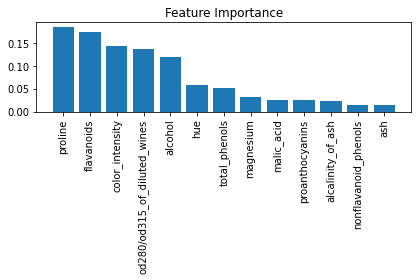

In [248]:
  forest.fit(X_train, y_train)
importances = forest.feature_importances_

indices = np.argsort(importances)[::-1]

for f in range(X_train.shape[1]):
  print(f'{f+1, 30, feat_labels[indices[f]], importances[indices[f]]}')

plt.title('Feature Importance')
plt.bar(range(X_train.shape[1]),
        importances[indices],
        align='center')
plt.xticks(range(X_train.shape[1]),
           feat_labels[indices], rotation=90)
plt.xlim([-1, X_train.shape[1]])
plt.tight_layout()
plt.show()

In [249]:
from sklearn.feature_selection import SelectFromModel

sfm = SelectFromModel(forest, threshold=0.1, prefit=True)
X_selcted =sfm.transform(X_train)
print(f'이 임계 조건을 만족하는 샘플의 수 : {X_selcted.shape[1]}')

이 임계 조건을 만족하는 샘플의 수 : 5


In [251]:
for f in range(X_selcted.shape[1]):
  print(f'{f+1, 30, feat_labels[indices[f]], importances[indices[f]]}')

(1, 30, 'proline', 0.18545260453273973)
(2, 30, 'flavanoids', 0.17475097557788732)
(3, 30, 'color_intensity', 0.14391990337231414)
(4, 30, 'od280/od315_of_diluted_wines', 0.1361619442214559)
(5, 30, 'alcohol', 0.11852941731789315)


##4.7 요약

범주형 변수의 인코딩

순서가 있는 것과 없는 특성 값의 정수 매핑

모델 복잡도를 감소시켜 과대적합을 피하는 L1 규제

관련 없는 특성을 제거하는 순차 특성 선택 알고리즘